X.shape (200, 2)
y.shape (200,)


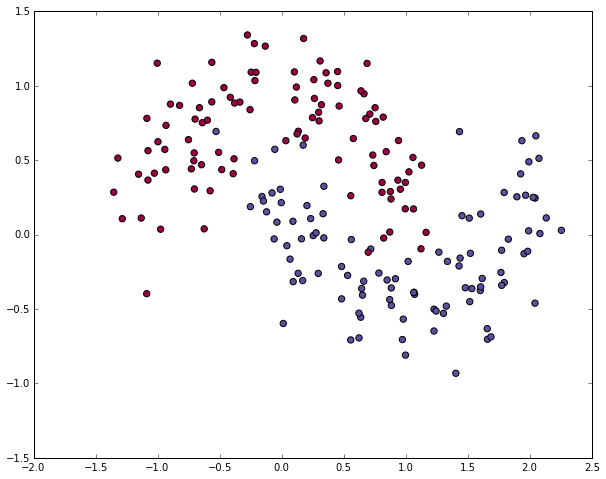

In [2]:
# Package imports
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib

# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
print 'X.shape', X.shape
print 'y.shape', y.shape
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)
y = y.reshape(y.size, 1)


In [3]:
print X.shape
print y.shape

(200, 2)
(200, 1)


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:117: RuntimeWarning: divide by zero encountered in log


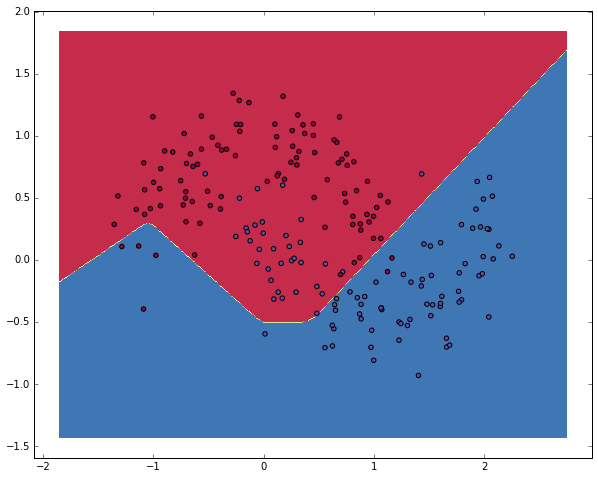

In [53]:

rand = np.random.RandomState(3)
theta1 = 0.1 * np.abs(rand.rand(2, 6))
theta2 = 0.1 * np.abs(rand.rand(6, 4))
theta3 = 0.1 * np.abs(rand.rand(4, 2))

bias1 = np.zeros((1,6))
bias2 = np.zeros((1,4))
bias3 = np.zeros((1,1))

thetas = [theta1, theta2, theta3]
biases = [bias1, bias2, bias3]

# Helper function to plot a decision boundary.
# If you don't fully understand this function don't worry, it just generates the contour plot below.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

def sigmoid(z):
    return np.tanh(z)
#     return 1.0 / (1.0 + np.exp(-z))

def dsigmoid(z):
    return (1 - np.power(z, 2))
#     return z * (1 - z)
#     return sigmoid(z) * (1 - sigmoid(z))

def forward_propagation(X, thetas, biases):
    a = X
    for i, theta in enumerate(thetas):
#         print 'a', a
#         print 'theta', theta
        bias = biases[i]
        z = np.dot(a, theta) + bias
        a = sigmoid(z)

        if i == len(thetas)-1:
            exp_scores = np.exp(z)
            a = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        else:
            a = sigmoid(z)

    return a

# Helper function to evaluate the total loss on the dataset
def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate our predictions
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # Calculating the loss
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    # Add regulatization term to loss (optional)
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss

def compute_cost(X, y, thetas, biases, reg_lambda):
    m = X.shape[0]
    h = forward_propagation(X, thetas, biases)
    
#     print 'h', h
    e1 = np.dot(y.T, np.log(h))
    e2 = np.dot((1-y.T), np.log(1-h))
    
    errors = (e1 + e2).sum()
    
    theta_sum = 0
    for theta in thetas:
        t = np.power(theta, 2).sum()
        theta_sum += t
    reg = (reg_lambda/(2.0*m)) * theta_sum
    probs = -((1.0/m) * errors) + reg
    return probs

def to_one_hot(y):
    m = y.shape[0]
    
    K = len(np.unique(y))
    one_hot = np.zeros(shape=(m, K))
    for i, row in enumerate(one_hot):
#         if i < 10:
        idx = y[i]
        row[idx] = 1
    return one_hot

def compute_cost_softmax(X, y, thetas, biases, reg_lambda):
    m = X.shape[0]
    h = forward_propagation(X, thetas, biases)
    
#     h[range(m), y.ravel()] -= 1
#     y_hot = to_one_hot(y)
    
#     print 'y_hot', y_hot
#     print 'h', h
#     print (y_hot * np.log(h))
#     errors = (y_hot * np.log(h)).sum()

#     h[range(m), y.ravel()] -= 1
#     errors = h.sum()
#     print h
#     print y.ravel()
    errors = (np.log(h[range(m), y.ravel()])).sum()
#     h = np.argmax(h, axis=1).reshape(m,1)
#     errors = np.abs(h-y).sum()
#     data_loss = np.sum(corect_logprobs)

#     e1 = np.dot(y.T, np.log(h))
#     e2 = np.dot((1-y.T), np.log(1-h))
    
#     errors = (e1 + e2).sum()
    
    theta_sum = 0
    for theta in thetas:
        t = np.power(theta, 2).sum()
        theta_sum += t
    reg = (reg_lambda/(2.0*m)) * theta_sum
    probs = -((1.0/m) * (errors ) ) + reg
    return probs

    
def predict(X, thetas, biases):
    probs = forward_propagation(X, thetas, biases)
#     print probs
#     probs[probs > 0.5] = 1
#     probs[probs <= 0.5] = 0
    m = probs.shape[0]
#     print probs
    return np.argmax(probs, axis=1).reshape(m,1)

def compute_gradient(X, y, thetas, biases, reg_lambda):
    m = X.shape[0]
    a = X
    zs = [None]
    activations = [a]
    for i, theta in enumerate(thetas):
        bias = biases[i]
        z = np.dot(a, theta) + bias
        zs.append(z)

        if i == len(thetas)-1:
            exp_scores = np.exp(z)
            a = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        else:
            a = sigmoid(z)

        activations.append(a)


    n = len(activations)
    rng = list(reversed(range(len(thetas))))
    
    l = len(thetas)
    deltas = [None] * l

    probs = activations[l]

    
    exp_scores = np.exp(probs)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    
#     print 'probs', probs
    probs[range(m), y.ravel()] -= 1
#     dlta = probs - y
    dlta = probs
    
    deltas[l-1] = dlta
    for i in range(l-1-1,0-1,-1):
        theta = thetas[i+1]
        activation = activations[i+1]
        dlta = np.dot(deltas[i+1], theta.T) * dsigmoid(activation)
        deltas[i] = dlta

    bias_gradients = []
    for i, dlta in enumerate(deltas):
        bias_gradient = np.sum(dlta, axis=0, keepdims=True)
        bias_gradients.append(bias_gradient)
        
    theta_gradients = []
    
    for i, dlta in enumerate(deltas):
        activation = activations[i]
        theta = thetas[i]
        theta_gradient = np.dot(activation.T, dlta) + reg_lambda * theta
        theta_gradients.append(theta_gradient)
    
    # WEIRD BUG When doing np.array(bias_gradients)
    return np.array(theta_gradients), bias_gradients


costs = []
alpha = 0.01
reg_lambda = 0.05
for i in range(440):
    cost = compute_cost_softmax(X, y, thetas, biases, reg_lambda)
    costs.append(cost)
    theta_gradients, bias_gradients = compute_gradient(X, y, thetas, biases, reg_lambda)
    thetas -= alpha * theta_gradients

    
    new_biases = []
    for i in range(len(bias_gradients)):
        new_bias = biases[i] - alpha * bias_gradients[i]
        new_biases.append(new_bias)
    biases = new_biases

# print predict(X, thetas, biases)
plot_decision_boundary(lambda X: predict(X, thetas, biases))    
# print thetas


0.8
Loss after iteration 0: 0.693231
Loss after iteration 20: 3.426104
Loss after iteration 40: 11.536644
Loss after iteration 60: 9.472870
Loss after iteration 80: 8.507123
Loss after iteration 100: 9.222478
Loss after iteration 120: 18.714817
Loss after iteration 140: 16.423815
Loss after iteration 160: 10.271998
Loss after iteration 180: 39.185329
Loss after iteration 200: 31.050888
Loss after iteration 220: 31.685373
Loss after iteration 240: 32.578870
Loss after iteration 260: 40.955199
Loss after iteration 280: 43.156226
Loss after iteration 300: 46.704437
Loss after iteration 320: 50.278098
Loss after iteration 340: 53.874503
Loss after iteration 360: inf
Loss after iteration 380: inf
Loss after iteration 400: inf
Loss after iteration 420: inf


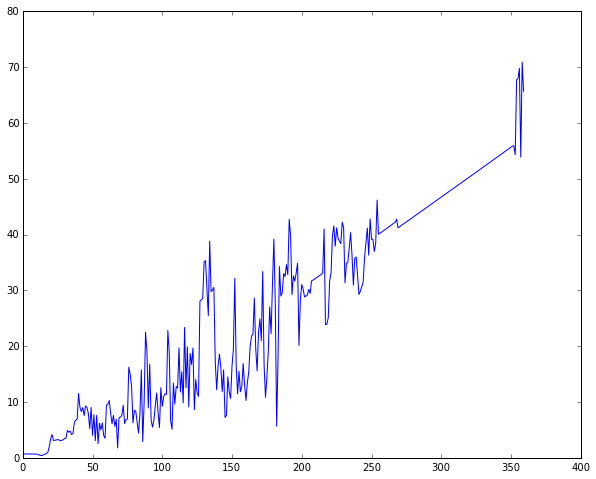

In [54]:

predicted = predict(X, thetas, biases)
m = y.shape[0]
correct = predicted == y

print correct.sum() / float(m)
plt.plot(costs)

for i, c in enumerate(costs):
    if i % 20 == 0:
        print "Loss after iteration %i: %f" %(i, c)

In [390]:
# compute_cost_softmax(X, y, thetas, biases, 0.05)

2.2550241521244399

In [393]:
# print to_one_hot(y)
# y

In [ ]:
def compute_gradient(X, y, w1, b1, w2, b2, alpha, reg_lambda):

  def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

  def dsigmoid(z):
    return (z) * (1 - (z))

  activation = sigmoid

  a1 = X
  z2 = np.dot(a1, w1) + b1
  a2 = activation(z2)
  z3 = np.dot(a2, w2) + b2
  a3 = activation(z3)

  delta3 = a3 - y
#   print 'delta3', delta3

  delta2 = np.dot(delta3, w2.T) *( dsigmoid(a2) )
  # delta1 = np.dot(delta2.T, w1.T) * dsigmoid(a1)

  dW2 = np.dot(a2.T, delta3) + reg_lambda * w2
  dB2 = np.sum(delta3, axis=0, keepdims=True)

  dW1 = np.dot(a1.T, delta2) + reg_lambda * w1
  dB1 = np.sum(delta2, axis=0, keepdims=True)

  return dW1, dW2

In [ ]:
compute_gradient(X, y, thetas[0], 0, thetas[1], 0, 0, 0.0)

In [ ]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def dsigmoid(z):
    return z * (1 - z)

In [ ]:
i = range(-10, 10, 1)
print i
print (sigmoid(np.array(i)))

# np.arary

plt.plot(sigmoid(np.array(i)))

In [ ]:
plt.plot(dsigmoid(np.array(i)))

In [27]:
range(4,0,-1)

[4, 3, 2, 1]

In [519]:

# rand = np.random.RandomState(1)
# theta1 = rand.rand(2, 4)


# print theta1
# print theta1[[(0,1),(1,1)]]

# print theta1 / theta1.sum(axis=1, keepdims=True)

# print y

# [range(200), y]

rand = np.random.RandomState(3)
theta1 = 1 * (rand.rand(2, 6))
theta2 = 1 * (rand.rand(6, 4))
theta3 = 1 * (rand.rand(4, 2))

bias1 = rand.rand(1,6)
bias2 = rand.rand(1,4)
bias3 = rand.rand(1,1)

thetas = [theta1, theta2, theta3]
biases = [bias1, bias2, bias3]


#     a = X
#     for i, theta in enumerate(thetas):
# #         print 'a', a
# #         print 'theta', theta
#         bias = biases[i]
#         z = np.dot(a, theta) + bias
#         a = sigmoid(z)

#         if i == len(thetas)-1:
#             exp_scores = np.exp(z)
#             a = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
#         else:
#             a = sigmoid(z)

z1 = np.dot(X, thetas[0]) + biases[0]
print 'z1', z1
a2 = sigmoid(z1)
print 'a2', a2
z2 = np.dot(a2, thetas[1]) + biases[1]
# print theta1
# h = forward_propagation(X, thetas, biases)
# h[[range(200), y]]
# print h

z1 [[ 0.92553727  1.48331104  0.82644385  0.86809344  0.95573107  1.33325164]
 [ 1.29129123  1.90334498  1.03591508  0.8516078   1.73920493  1.6515456 ]
 [ 0.40235622  0.80110999  0.55322811  0.31515303  0.14383125  0.42917915]
 ..., 
 [ 0.61175416  1.05916951  0.66744409  0.43030237  0.52564688  0.70838784]
 [ 0.73118967  1.25983035  0.71523328  0.87479308  0.54052666  1.16251876]
 [ 1.27992648  1.91190506  1.0223911   1.00522797  1.63285342  1.7608386 ]]
a2 [[ 0.71616902  0.81507217  0.69560248  0.70434883  0.72226628  0.79137799]
 [ 0.78436566  0.87026964  0.73806105  0.70090431  0.85058605  0.83909983]
 [ 0.59925364  0.69021187  0.63488421  0.57814256  0.53589595  0.60567764]
 ..., 
 [ 0.64834085  0.74253181  0.66093061  0.60594587  0.62846724  0.67004483]
 [ 0.67506628  0.7789969   0.67155649  0.70574206  0.63193492  0.76179009]
 [ 0.78243726  0.87123302  0.7354381   0.73208522  0.83656015  0.85331466]]
